# Apply GraphVelo to HCMV dataset

In this tutorial, we will show how to incorporate GraphVelo with current dynamo workflow.

GraphVelo is able to infer the kinetic factors which do not undergoing splicing events using RNA velocity. 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import dynamo as dyn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import graphvelo
from graphvelo.plot import gene_trend
from graphvelo.graph_velocity import GraphVelo

## Load data file
You can also get access to it via https://drive.google.com/file/d/1E_gpsRRuTrrIX8qX4biPejzjiKbD5hKd/view?usp=drive_link

You can download the adata file via https://drive.google.com/file/d/1uH5HJ7EqjnF94oovxxCYuB4-Oc6gKBgt/view?usp=drive_link

In [3]:
gtf_data = graphvelo.datasets.hcmv_annot()
gtf_data[8] = gtf_data[8].str.extract(r'gene_id "([^"]+)"')
viral_genes_names = gtf_data[8].unique()
viral_genes_names = np.delete(viral_genes_names, np.where(viral_genes_names=='UL38')) # Exclude 0 expression viral gene
len(viral_genes_names)

66

In [4]:
adata = sc.read('datasets/hcmv/hcmv_preprocessed.h5ad')
adata

AnnData object with n_obs × n_vars = 1454 × 28051
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_Protein', 'nFeature_Protein', 'batch', 'percent.mt', 'Demultiplex', 'TotalVir', 'TotalVirPercentage', 'CD45', 'HLA.DR', 'HCMV.Status', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'clusters', 'donor', 'Cluster.Type', 'annot'
    uns: 'genes_to_use'
    obsm: 'X_umap'
    layers: 'spliced', 'unspliced'

In [5]:
host_genes = ~pd.Series(adata.var_names).isin(viral_genes_names.tolist()).values
viral_genes = pd.Series(adata.var_names).isin(viral_genes_names.tolist()).values
host_genes_names = adata.var_names[host_genes]
viral_genes_names = adata.var_names[viral_genes]

In [6]:
valid_genes = list(viral_genes_names)+['IFNB1']  # Include IFNB1 which serves as an important host gene in the immune process

## Standard dynamo preprocessing criteria

In [7]:
dyn.pp.recipe_monocle(adata, 
                      genes_use_for_norm=host_genes_names,
                      genes_to_append=valid_genes,
                      )

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> filtering cells...
|-----> 1454 cells passed basic filters.
|-----> filtering gene...
|-----> 7661 genes passed basic filters.
|-----> calculating size factor...
|-----> selecting genes in layer: X, sort method: SVR...
|-----> size factor normalizing the data, followed by log1p transformation.

In [8]:
dyn.tl.dynamics(adata)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] completed [6.5298s]


estimating gamma: 100%|██████████| 1999/1999 [00:14<00:00, 141.37it/s]


AnnData object with n_obs × n_vars = 1454 × 28051
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_Protein', 'nFeature_Protein', 'batch', 'percent.mt', 'Demultiplex', 'TotalVir', 'TotalVirPercentage', 'CD45', 'HLA.DR', 'HCMV.Status', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'clusters', 'donor', 'Cluster.Type', 'annot', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'spliced_Size_Factor', 'initial_cell_size', 'initial_unspliced_cell_size', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics'
    uns: 'genes_to_use', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_order', 'cell_phase_genes', 'vel_params_names', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    varm: 'vel_params'
    layers: 'spl

In [9]:
dyn.tl.neighbors(adata)

|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected


AnnData object with n_obs × n_vars = 1454 × 28051
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_Protein', 'nFeature_Protein', 'batch', 'percent.mt', 'Demultiplex', 'TotalVir', 'TotalVirPercentage', 'CD45', 'HLA.DR', 'HCMV.Status', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'clusters', 'donor', 'Cluster.Type', 'annot', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'spliced_Size_Factor', 'initial_cell_size', 'initial_unspliced_cell_size', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics'
    uns: 'genes_to_use', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_order', 'cell_phase_genes', 'vel_params_names', 'dynamics', 'neighbors'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    varm: 'vel_params'
   

## Apply GraphVelo to refine manifold-constrained velocity vectors

In [10]:
gv = GraphVelo(adata, xkey='M_s', vkey='velocity_S')
gv.train() 

Learning Phi in tangent space projection.: 100%|██████████| 1454/1454 [00:03<00:00, 373.41it/s]


In [11]:
adata.layers['velocity_gv'] = gv.project_velocity(adata.layers['M_s'])
adata.obsm['gv_pca'] = gv.project_velocity(adata.obsm['X_pca'])
adata.obsm['gv_umap'] = gv.project_velocity(adata.obsm['X_umap'])

projecting velocity vector to low dimensional embedding: 100%|██████████| 1454/1454 [00:08<00:00, 168.14it/s]
projecting velocity vector to low dimensional embedding: 100%|██████████| 1454/1454 [00:00<00:00, 19916.19it/s]
projecting velocity vector to low dimensional embedding: 100%|██████████| 1454/1454 [00:00<00:00, 18743.85it/s]


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap


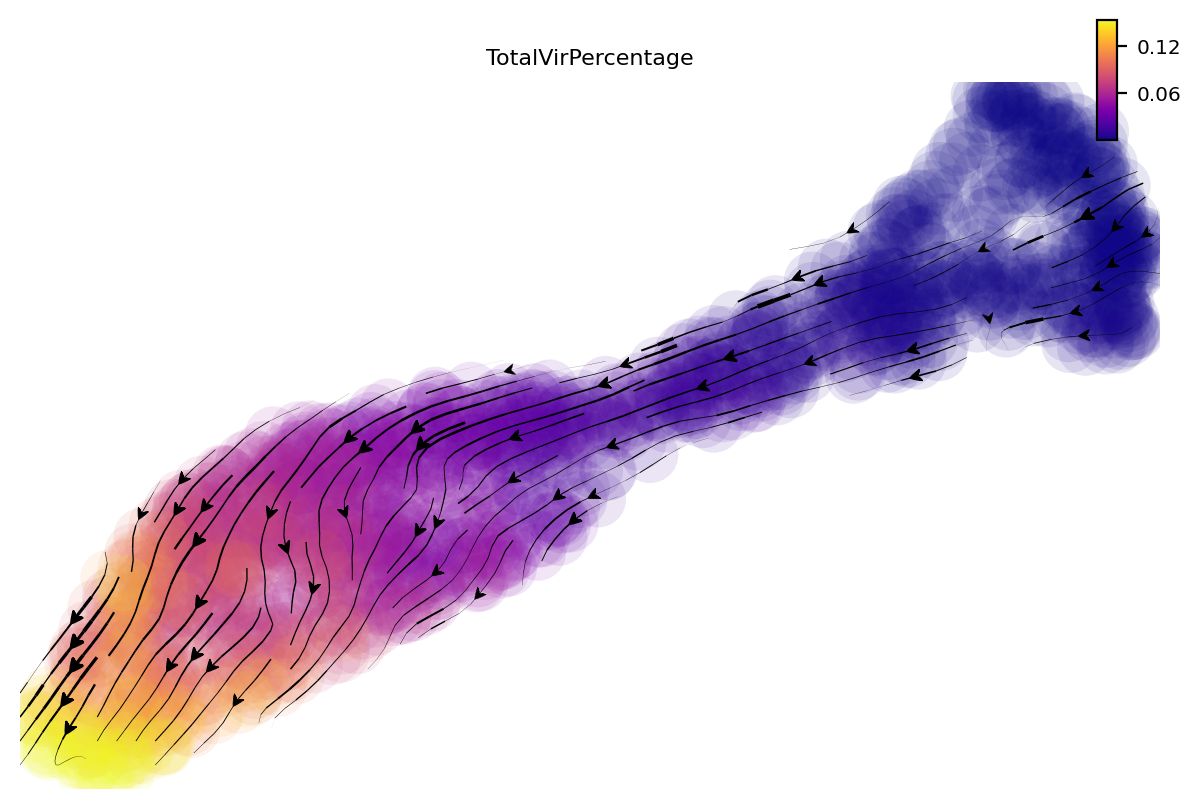

In [12]:
dyn.pl.streamline_plot(adata, color=['TotalVirPercentage'], vector='gv', cmap='plasma')

In [13]:
adata = adata[:, adata.var['use_for_pca']]
adata

View of AnnData object with n_obs × n_vars = 1454 × 1999
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_Protein', 'nFeature_Protein', 'batch', 'percent.mt', 'Demultiplex', 'TotalVir', 'TotalVirPercentage', 'CD45', 'HLA.DR', 'HCMV.Status', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'clusters', 'donor', 'Cluster.Type', 'annot', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'spliced_Size_Factor', 'initial_cell_size', 'initial_unspliced_cell_size', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics'
    uns: 'genes_to_use', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_order', 'cell_phase_genes', 'vel_params_names', 'dynamics', 'neighbors'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'gv_pca', 'gv_umap

Fitting trends using GAM:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting trends using GAM: 100%|██████████| 2/2 [00:00<00:00, 42.03it/s]


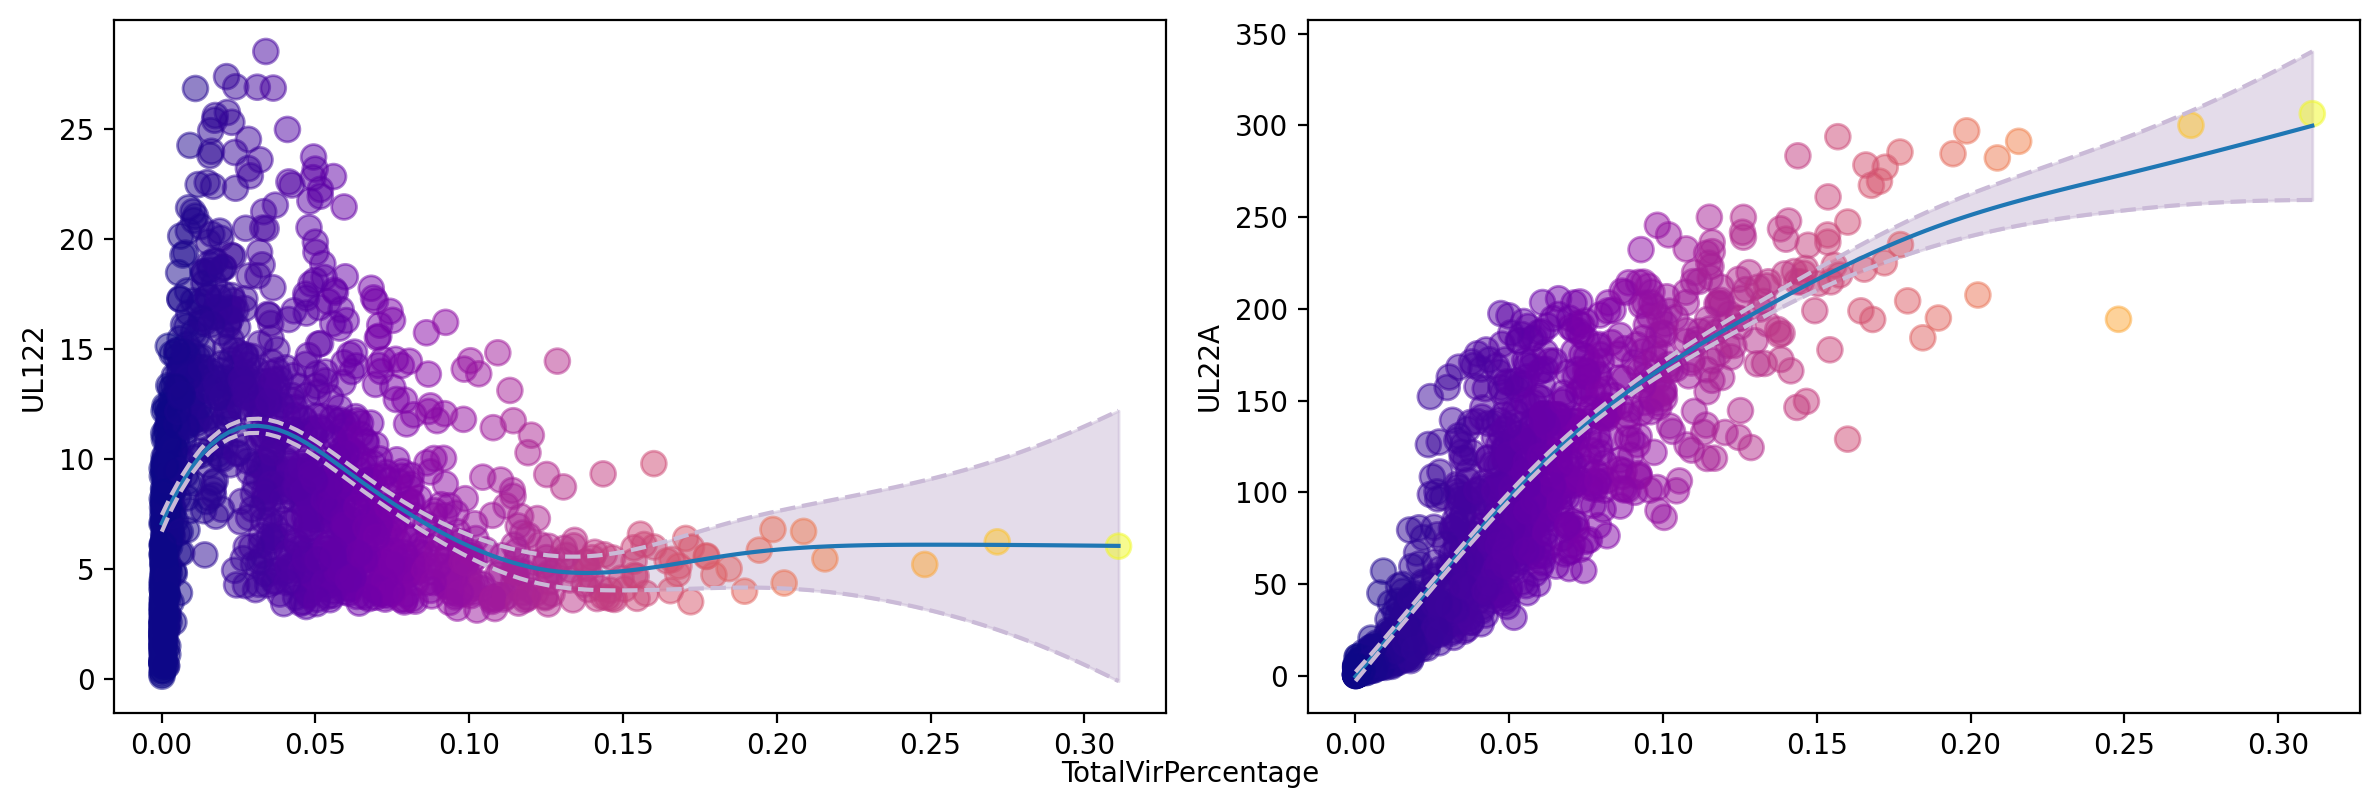

Fitting trends using GAM: 100%|██████████| 2/2 [00:00<00:00, 22.52it/s]


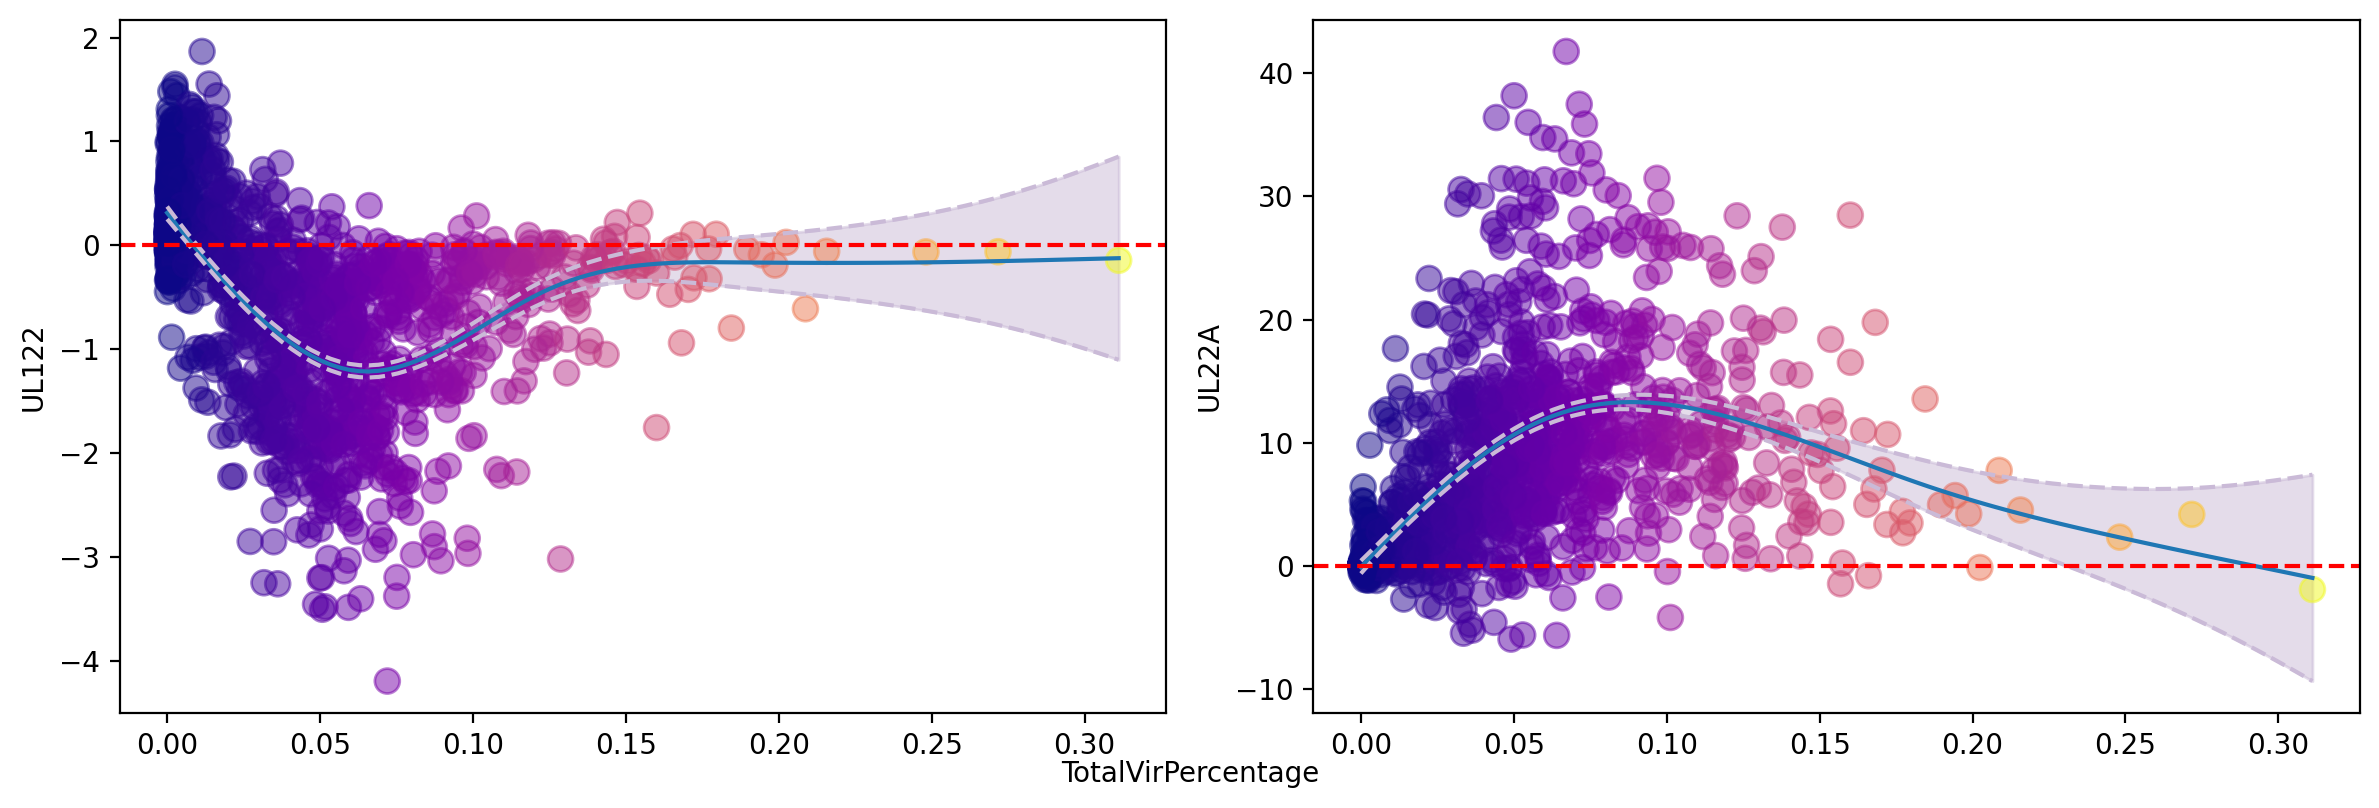

In [14]:
gene_trend(adata, ['UL122', 'UL22A'], layer='M_s', tkey='TotalVirPercentage', color='TotalVirPercentage', n_splines=8, pointsize=80)
plt.show()
gene_trend(adata, ['UL122', 'UL22A'], layer='velocity_gv', tkey='TotalVirPercentage', color='TotalVirPercentage', zero_indicator=True, n_splines=8, pointsize=80)
plt.show()

## Working with dynamo vector field analyses

In [15]:
adata.obsm['velocity_umap'] = adata.obsm['gv_umap'].copy()
dyn.vf.VectorField(adata, basis='umap', M=100, pot_curl_div=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [11.0037s]
|-----> Running ddhodge to estimate vector field based pseudotime in umap basis...
|-----> graphizing vectorfield...
|-----------? nbrs_idx argument is ignored and recomputed because nbrs_idx is not None and return_nbrs=True
|-----------> calculating neighbor indices...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [ddhodge completed] completed [10.3228s]
|-----> Computing curl...


Calculating 2-D curl: 100%|██████████| 1454/1454 [00:00<00:00, 27264.60it/s]

|-----> Computing divergence...



Calculating divergence: 100%|██████████| 2/2 [00:00<00:00, 90.93it/s]

|-----> [VectorField] completed [21.4902s]


|-----> Vector field for umap is but its topography is not mapped. Mapping topography now ...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap


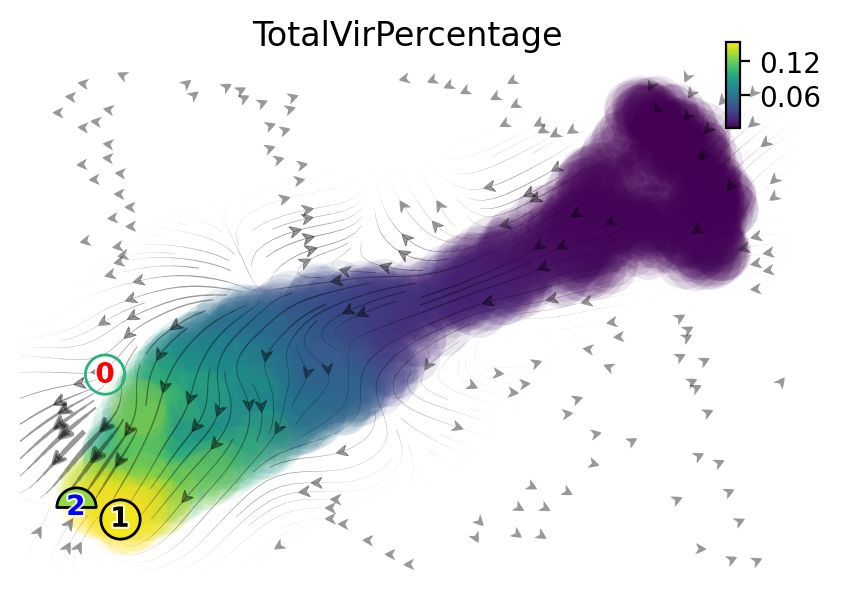

In [16]:
fig, ax = plt.subplots(figsize=(5,4))
ax = dyn.pl.topography(adata, n=20,
                       color='TotalVirPercentage', ax=ax, 
                       save_show_or_return='return', 
                       color_key_cmap='plasma',)
ax.set_aspect(0.8)
plt.show()

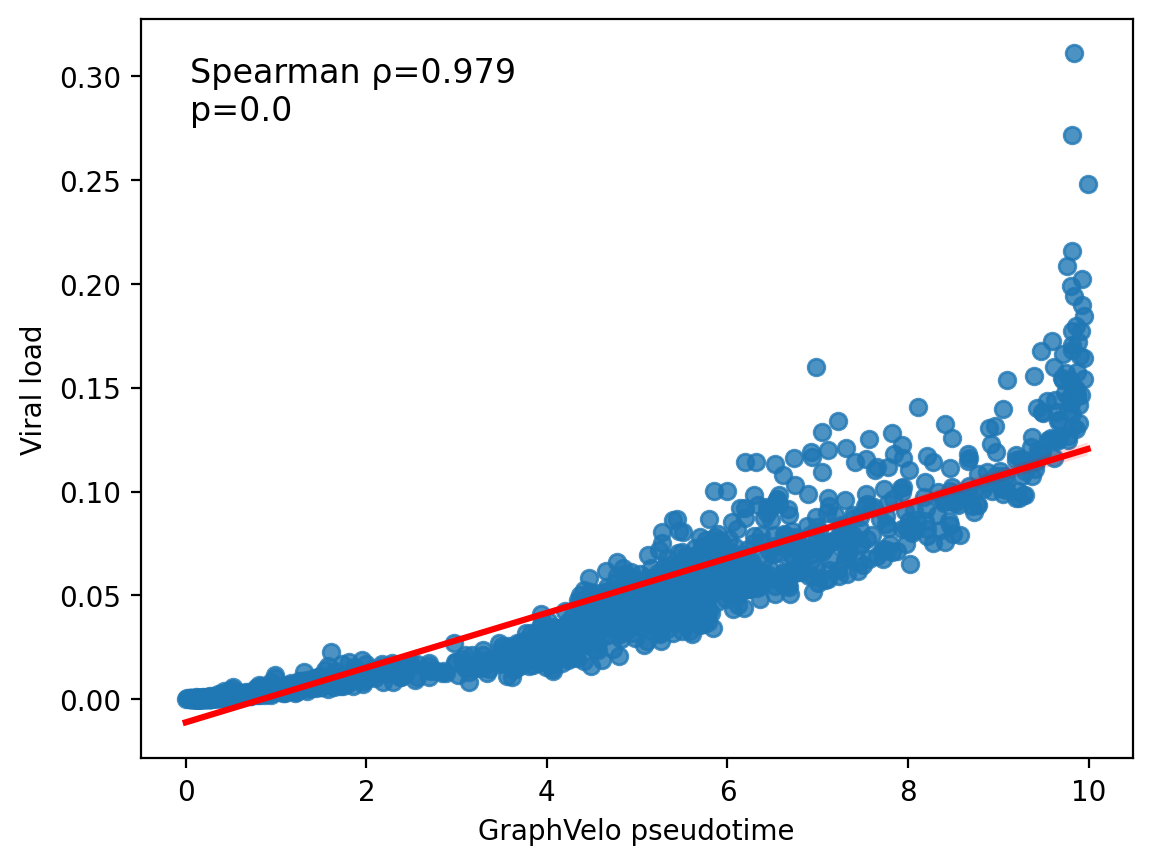

In [17]:
df = adata.obs[['umap_ddhodge_potential', 'TotalVirPercentage']]
df.columns = ['GraphVelo pseudotime', 'Viral load']

import scipy
res = scipy.stats.spearmanr(df['GraphVelo pseudotime'], df['Viral load'])
ax = sns.regplot(df, x='GraphVelo pseudotime', y='Viral load', line_kws=dict(color="r"))
ax.text(0.05, 0.95, s=f'Spearman \u03C1={res[0]:.3f}\np=0.0', transform=ax.transAxes, fontsize=12, color='black', verticalalignment='top')
# plt.savefig('figures_v2/graphvelo_time.pdf', format='pdf', dpi=300)
plt.show()

## Working with dynamo perturbation analyses

In [18]:
adata.obsm['velocity_pca'] = adata.obsm['gv_pca'].copy()
dyn.vf.VectorField(adata, basis='pca', M=500)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [SparseVFC] completed [4.3348s]
|-----> [VectorField] completed [4.4279s]


|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....


calculating Jacobian for each cell: 100%|██████████| 1454/1454 [00:00<00:00, 299607.86it/s]

|-----> project the pca perturbation vector to low dimensional space....
|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 5.1582%

|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [0.3061s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2248s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation


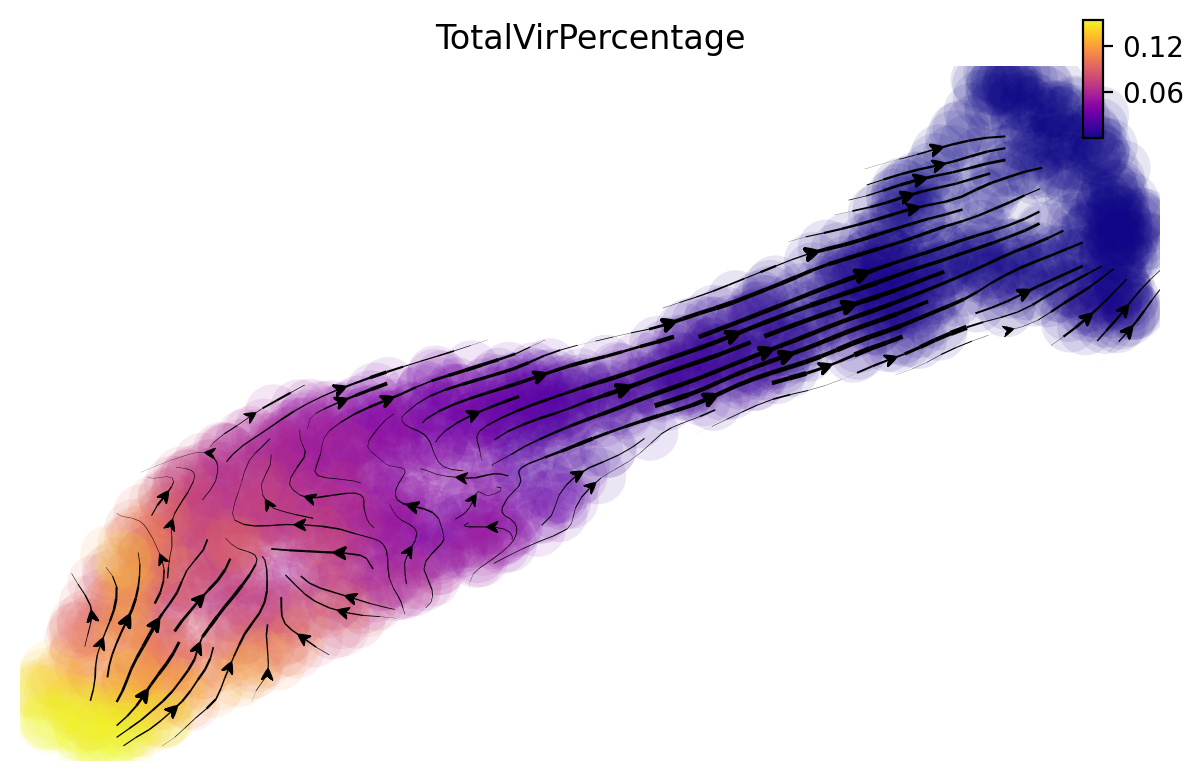

In [19]:
dyn.pd.perturbation(adata, 'UL112', [-100], emb_basis="umap", projection_method='cosine')
dyn.pl.streamline_plot(adata, color=['TotalVirPercentage'], basis="umap_perturbation", cmap='plasma')